In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import pyodbc as odbc

In [3]:
cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [4]:
#Importing the dataset, read straight from SQL
dataset=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_50k', cnxn)
dataset.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,0.733344,-0.204605,0.981473,0.937163,-0.638095,-0.291008,1901.0,47803.0
1,0.105120,-0.652139,0.981473,1.525021,1.183265,0.552862,13588.0,25068.0
2,0.942753,0.242928,-1.705279,0.937163,0.576145,-0.122234,2824.0,518.0
3,1.570978,-1.994739,-1.705279,-1.414272,0.576145,0.426281,3763.0,5135.0
4,-0.523105,1.137995,0.085889,-0.826413,-0.638095,1.481118,9820.0,21753.0
5,0.384331,1.137995,-0.809695,-0.826413,-1.245215,1.227957,6369.0,15929.0
6,-0.872119,-0.652139,0.981473,0.937163,-0.030975,-1.029394,872.0,34634.0
7,-1.919161,0.242928,-1.705279,1.525021,-1.245215,0.257507,3936.0,5914.0
8,-0.383500,0.690462,-0.809695,-0.238555,1.790385,-1.008297,876.0,34730.0
9,-0.174092,1.585529,-1.705279,1.525021,-1.245215,1.502215,8742.0,20344.0


In [5]:
#Defining X and y
X=dataset.iloc[:,0:6].values
y=dataset.iloc[:,-2].values

In [6]:
X

array([[ 0.73334442, -0.20460509,  0.98147332,  0.93716275, -0.63809506,
        -0.29100792],
       [ 0.10511955, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
         0.55286174],
       [ 0.94275271,  0.24292836, -1.70527938,  0.93716275,  0.57614496,
        -0.12223399],
       ...,
       [ 0.73334442, -1.09967199, -0.80969515, -0.23855468,  1.79038498,
        -1.05049061],
       [ 3.38584943,  0.24292836, -2.60086361,  0.34930404, -1.24521508,
         0.46847477],
       [ 0.10511955, -0.20460509,  0.98147332, -0.23855468,  1.79038498,
        -0.48087859]])

In [7]:
y

array([ 1901., 13588.,  2824., ...,   635.,  3633.,  2217.])

In [8]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X,y,test_size=0.2, random_state=42)

0.9591600213453176


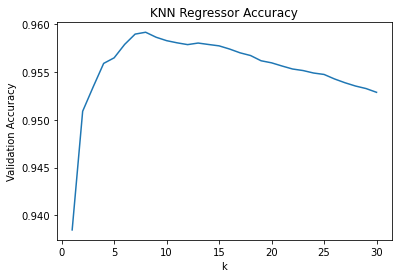

In [9]:
#Training the KNN Model with loop

accuracies = []

for k in range(1,31):
    from sklearn.neighbors import KNeighborsRegressor
    regressor=KNeighborsRegressor(n_neighbors=k, weights='uniform') #default is n_neighbors=5 & uniform
    regressor.fit(X_train,y_train)
    accuracies.append(regressor.score(X_test, y_test))

print(max(accuracies))


k_list = range(1,31)

plt.plot(k_list, accuracies)
plt.title("KNN Regressor Accuracy")
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()

In [10]:
max_value=max(accuracies)
max_n=accuracies.index(max_value)+1
print(max_n)
print(max(accuracies))

8
0.9591600213453176


In [11]:
#Training the KNN Model
import time
start = time.time()
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=8, weights='uniform') #default is n_neighbors=5 & uniform
regressor.fit(X_train,y_train)
train_time = time.time() - start

In [12]:
train_time

0.08680272102355957

In [13]:
import time
start = time.time()
y_pred=regressor.predict(X_test)
y_pred10k_time = time.time() - start
y_pred

array([3088.5  ,  653.375, 2084.125, ..., 1105.75 , 4497.625,  722.75 ])

In [14]:
y_test

array([2927.,  610., 2220., ...,  899., 4588.,  825.])

In [15]:
from sklearn import metrics
print("Mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("R2_Score:",metrics.r2_score(y_test,y_pred))

Mean squared error 636427.587084375
Mean absolute error 451.148425
R2_Score: 0.9591600213453176


In [16]:
y_pred10k_time

0.28276968002319336

In [17]:
regressor.score(X_train, y_train)

0.9685641076042814

In [18]:
regressor.score(X_test, y_test)

0.9591600213453176

In [19]:
trained_records = []
trained_records.append({
    'model': 'KNeighborsRegressor(n=08,weights=uniform)',
    'train_time': train_time,
    'test_time': y_pred10k_time,
    'train_r2': regressor.score(X_train, y_train),
    'test_r2': regressor.score(X_test, y_test),
    'test_MSE': metrics.mean_squared_error(y_test,y_pred),
    'test_MAE': metrics.mean_absolute_error(y_test,y_pred)})
trained_records

[{'model': 'KNeighborsRegressor(n=08,weights=uniform)',
  'train_time': 0.08680272102355957,
  'test_time': 0.28276968002319336,
  'train_r2': 0.9685641076042814,
  'test_r2': 0.9591600213453176,
  'test_MSE': 636427.587084375,
  'test_MAE': 451.148425}]

In [20]:
trained_records = pd.DataFrame(trained_records,columns=['model','train_time','test_time','train_r2','test_r2','test_MSE','test_MAE'])
trained_records

,model,train_time,test_time,train_r2,test_r2,test_MSE,test_MAE
0,"KNeighborsRegressor(n=08,weights=uniform)",0.086803,0.28277,0.968564,0.95916,636427.587084,451.148425


In [21]:
import sys
import pyodbc as odbc

cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [22]:
#Model must be in text format.

cursor = cnxn.cursor()
trained_insert = '''INSERT INTO ML_Parameter_Score_05oct (Model,Training_Time_40k_rows,Test_Time_10k_rows,Train_r2_score,Test_r2_score,Test_MSE,Test_MAE)
               VALUES (?,?,?,?,?,?,?)
'''
for rec in trained_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['train_time'],
        rec[1]['test_time'],
        rec[1]['train_r2'],
        rec[1]['test_r2'],
        rec[1]['test_MSE'],
        rec[1]['test_MAE']
    )
cursor.execute(trained_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!


In [23]:
Comparison=pd.DataFrame({"Actual:":y_test,"Predicted:":y_pred})
print(Comparison.to_string())

      Actual:  Predicted:
0      2927.0    3088.500
1       610.0     653.375
2      2220.0    2084.125
3      5147.0    5288.000
4     17227.0   15228.875
5      4739.0    5312.625
6      1024.0    1250.875
7      5798.0    4111.750
8      6350.0    6154.000
9       556.0     769.625
10      880.0     721.125
11     1404.0    1497.125
12      577.0     845.250
13      505.0     524.125
14      844.0     865.000
15      789.0     851.375
16      854.0    1007.000
17     2123.0    1953.875
18     5488.0    5255.875
19     2964.0    2655.625
20      743.0     708.125
21      789.0     924.125
22     6028.0    6471.375
23     1013.0     821.875
24     1125.0    1730.375
25     2397.0    2450.625
26      803.0     974.875
27     2348.0    2518.125
28      753.0     889.375
29     2343.0    2086.625
30     2096.0    2134.625
31      572.0     571.750
32     5816.0    5594.625
33     4257.0    4348.000
34    16294.0   14465.750
35     3908.0    3747.500
36     2210.0    2594.750
37      914.

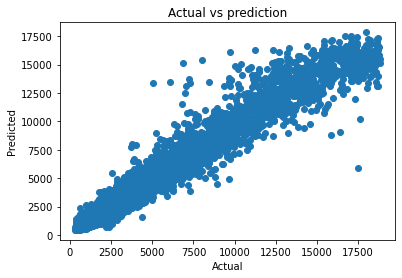

In [24]:
#Visualize
plt.scatter(y_test,y_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [25]:
#Importing the dataset SET ASIDE FOR INPUT TO PREDICT, read straight from SQL
input_data=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_tail_3940', cnxn)
input_data.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,-0.243894,-0.652139,0.981473,-1.414272,2.397505,-0.987200,694.0,29200.0
1,-0.034486,-0.652139,0.981473,1.525021,1.183265,-0.607459,2718.0,53703.0
2,-0.941922,1.585529,0.085889,-0.238555,-1.245215,2.535955,17136.0,27011.0
3,-0.523105,-0.204605,0.981473,0.937163,-0.030975,-0.565266,1727.0,46017.0
4,0.454133,0.242928,-0.809695,-1.414272,-0.638095,-1.008297,388.0,41584.0
5,0.523936,-0.652139,0.981473,0.937163,-0.030975,-0.523072,2030.0,48842.0
6,-0.872119,-0.652139,0.981473,1.525021,-0.030975,-1.008297,758.0,31322.0
7,0.733344,-1.994739,0.981473,-0.238555,1.790385,-1.029394,1046.0,38798.0
8,-1.779555,1.137995,-0.809695,0.349304,-0.638095,-0.206621,2453.0,52058.0
9,-1.570147,1.137995,0.085889,0.349304,-0.030975,-1.008297,773.0,31770.0


In [26]:
#Defining X and y FROM INPUT
inp_X=input_data.iloc[:,0:6].values
inp_y=input_data.iloc[:,-2].values

In [27]:
inp_X

array([[-0.24389427, -0.65213854,  0.98147332, -1.41427211,  2.397505  ,
        -0.98720039],
       [-0.03448598, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
        -0.60745904],
       [-0.94192191,  1.58552871,  0.08588908, -0.23855468, -1.24521508,
         2.53595544],
       ...,
       [ 2.12939968, -0.65213854, -2.60086361, -0.23855468,  1.18326497,
         1.48111837],
       [-2.05876612,  0.69046181,  0.08588908,  1.52502147, -1.24521508,
         0.44737803],
       [ 0.24472507, -0.65213854,  0.98147332, -2.00213083, -1.24521508,
         0.42628129]])

In [28]:
inp_y

array([  694.,  2718., 17136., ..., 13553.,  4672.,  3528.])

In [29]:
import time
start = time.time()
inpy_pred=regressor.predict(inp_X)
inpy_pred3940_time = time.time() - start
inpy_pred

array([  754.625,  2328.875, 15431.625, ...,  7068.75 ,  4315.25 ,
        4213.75 ])

In [30]:
print("Mean squared error",metrics.mean_squared_error(inp_y,inpy_pred))
print("Mean absolute error",metrics.mean_absolute_error(inp_y,inpy_pred))
print("R2_Score:",metrics.r2_score(inp_y,inpy_pred))

Mean squared error 703758.126487151
Mean absolute error 480.57496827411165
R2_Score: 0.9592357119650335


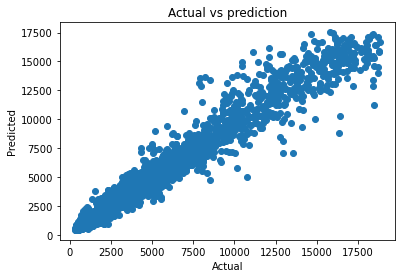

In [31]:
#Visualize
plt.scatter(inp_y,inpy_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [32]:
Comparison=pd.DataFrame({"Actual:":inp_y,"Predicted:":inpy_pred})
print(Comparison.to_string()) 

      Actual:  Predicted:
0       694.0     754.625
1      2718.0    2328.875
2     17136.0   15431.625
3      1727.0    1810.250
4       388.0     667.625
5      2030.0    1758.250
6       758.0     887.000
7      1046.0     992.000
8      2453.0    2362.500
9       773.0     699.375
10     1289.0    1089.250
11    13908.0   10876.500
12      689.0     822.375
13      814.0     815.625
14     2646.0    3422.125
15    12291.0   10553.625
16     4963.0    4102.125
17     1122.0    1480.375
18     5350.0    3946.375
19      770.0    1046.750
20     7764.0    7515.500
21     1219.0    1629.500
22     1662.0    1898.250
23      593.0     885.500
24     1061.0     762.375
25     2264.0    1728.500
26      827.0     905.375
27     4821.0    3622.125
28    18741.0   15865.625
29     8055.0    7911.250
30     5846.0    4342.625
31     4315.0    4780.875
32     1046.0     986.375
33    11365.0   10928.625
34      696.0     822.000
35    18371.0   13375.750
36     2990.0    3355.875
37     5273.

In [33]:
regressor.score(inp_X, inp_y)

0.9592357119650335

In [34]:
inpy_pred3940_time

0.10886025428771973

ONLY KEY FOR TOP R2 SCORES

In [35]:
prediction_records = []
prediction_records.append({
    'model': 'KNeighborsRegressor(n=08,weights=uniform)',
    'prediction_time': inpy_pred3940_time,
    'r2': regressor.score(inp_X, inp_y),
    'MSE': metrics.mean_squared_error(inp_y,inpy_pred),
    'MAE': metrics.mean_absolute_error(inp_y,inpy_pred)})
prediction_records

[{'model': 'KNeighborsRegressor(n=08,weights=uniform)',
  'prediction_time': 0.10886025428771973,
  'r2': 0.9592357119650335,
  'MSE': 703758.126487151,
  'MAE': 480.57496827411165}]

In [36]:
prediction_records = pd.DataFrame(prediction_records,columns=['model','prediction_time','r2','MSE','MAE'])
prediction_records

,model,prediction_time,r2,MSE,MAE
0,"KNeighborsRegressor(n=08,weights=uniform)",0.10886,0.959236,703758.126487,480.574968


In [37]:
cursor = cnxn.cursor()
prediction_insert = '''INSERT INTO ML_Predictions_Score_05oct (Model,Prediction_Time_3940_rows,Prediction_r2,Prediction_MSE,Prediction_MAE)
               VALUES (?,?,?,?,?)
'''
for rec in prediction_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['prediction_time'],
        rec[1]['r2'],
        rec[1]['MSE'],
        rec[1]['MAE']
    )
cursor.execute(prediction_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!
